# PCA

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [87]:
voice = pd.read_csv("voice.csv") #carregando o dataset

In [88]:
#Normalizando o dataset
min_max_scaler = preprocessing.MinMaxScaler()
voice_scaled = min_max_scaler.fit_transform(voice)
voice = pd.DataFrame(voice_scaled,columns=voice.columns)

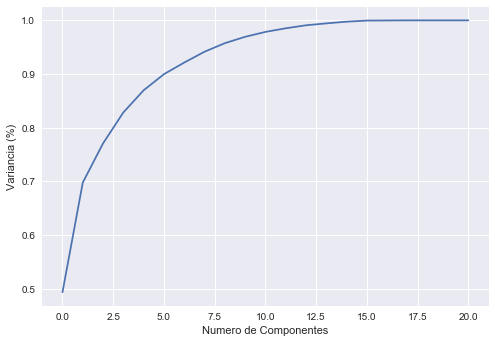

In [109]:
# ESCOLHENDO O NUMERO DE COMPONENTES. 
# A Curva resultante mostra o quanto da variancia total está contida nos N primeiros componentes
pca = PCA().fit(voice)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de Componentes')
plt.ylabel('Variancia (%)');
plt.savefig('pca-components.png')

In [104]:
#Criando novo dataset com as features
data = voice.values[:,:20] #removendo a coluna das classes
pca = PCA(n_components=4)

# Realiza o PCA e cria os eigen
pca.fit(data) 

# Transforma os dados utilizando os vetores
pca_data = pca.transform(data) 

#Insere os dados normalizados
voice_pca = pd.DataFrame(min_max_scaler.fit_transform(pca_data), columns=['var1','var2','var3','var4']) 

#Adiciona os labels
voice_pca['label'] = voice['label'] 
voice_pca.head()

,var1,var2,var3,var4,label
0,0.950681,0.244422,0.778701,0.271061,0.0
1,0.958705,0.166170,0.815179,0.340872,0.0
2,0.979964,0.162726,0.949242,0.571129,0.0
3,0.786553,0.503014,0.377060,0.375035,0.0
4,0.777072,0.685569,0.497369,0.289334,0.0


In [107]:
%%capture
sns.pairplot(voice_pca, hue='label');